In [1]:
# Name: Law Enforecement Situational Threat Recognition
# Purpose: Intro to Machine Learning Final Project 
# Authors: Tim Johnson and Trevor Goad
# Date Created: November 28, 2021

In [2]:
# Import basic libraries
import numpy as np 
import matplotlib.pyplot as plot 
import pandas as pd 

In [3]:
# Read the csv file that has the dataset
dataset = pd.read_csv('SL City Data with 3 classes.csv');
dataset.head()

,time of day,day of the week,x coordinate,y coordinate,weapon used,result
0,2038,FRIDAY,1535558,7449362,Personal Weapons,SAFE
1,1531,SATURDAY,1878149,891728,Personal Weapons,POTENTIAL NON-FATAL ASSAULT
2,1502,WEDNESDAY,1892204,876892,Personal Weapons,POTENTIAL NON-FATAL ASSAULT
3,25,FRIDAY,1524877,7435491,Personal Weapons,SAFE
4,2045,THURSDAY,1534170,7448563,None,SAFE


In [4]:
dataset.shape

(1900, 6)

In [5]:
# Defining the day of the week map function
def dayofweek_map(x):
    
    return x.map({'SUNDAY': 1, "MONDAY": 2, "TUESDAY": 3, "WEDNESDAY": 4, "THURSDAY": 5, "FRIDAY": 6, "SATURDAY": 7})

# Defining the type of call map function
def weapon_map(x):
    
    return x.map({'Personal Weapons': 0,'Firearm': 1, "Knife": 2, "Motor Vehicle": 3, "Blunt Object": 4, "None": 5, "Other": 6})

# Defining the map function
def results_map(x):
    
    return x.map({'POTENTIAL FATAL ASSAULT': 2,'POTENTIAL NON-FATAL ASSAULT': 1, "SAFE": 0})

In [6]:
# Map day of week input
dayofweek_vars = ['day of the week']

dataset[dayofweek_vars] = dataset[dayofweek_vars].apply(dayofweek_map)

# Map weapon used by offender input
weapon_vars = ['weapon used']

dataset[weapon_vars] = dataset[weapon_vars].apply(weapon_map)

# Map result output
res_vars = ['result']

dataset[res_vars] = dataset[res_vars].apply(results_map)

dataset.head()

,time of day,day of the week,x coordinate,y coordinate,weapon used,result
0,2038,6,1535558,7449362,0,0
1,1531,7,1878149,891728,0,1
2,1502,4,1892204,876892,0,1
3,25,6,1524877,7435491,0,0
4,2045,5,1534170,7448563,5,0


In [7]:
# Split dataset into independent and dependent variables
x = dataset.iloc[:, [0,1,2,3,4]].values
y = dataset.iloc[:, 5].values


In [8]:
# Standardizing the features
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
x = StandardScaler().fit_transform(x)

In [9]:
# Perform PCA analysis
from sklearn.decomposition import PCA 
pca = PCA(n_components=5) 
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents 
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5']) 

In [10]:
# Concatenate new principal components with dataset labels
finalDf = pd.concat([principalDf, dataset[['result']]], axis = 1)

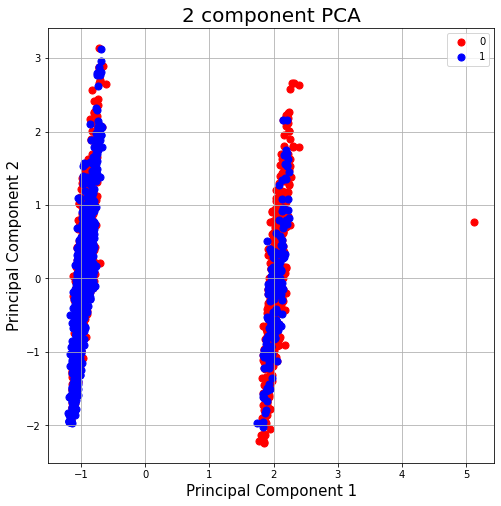

In [11]:
# Plot PCA data
fig = plot.figure(figsize = (8,8)) 
ax = fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20) 
targets = [0, 1] 
colors = ['r', 'b'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['result'] == target 
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] 
               , finalDf.loc[indicesToKeep, 'principal component 2'] 
               , c = color 
               , s = 50) 
ax.legend(targets) 
ax.grid()

In [12]:
# Split into 80% training and 20% evaluation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(principalDf, y, train_size = 0.8, test_size = 0.2, random_state = 5)
#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.9, test_size = 0.1, random_state = 5)

# Scale data
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic regression on training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight = 'balanced');
classifier.fit(x_train, y_train)

# Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
#classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 84,  69,  29],
       [ 27, 102,  22],
       [ 10,  10,  27]], dtype=int64)

In [14]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, digits=2))


              precision    recall  f1-score   support

           0       0.69      0.46      0.55       182
           1       0.56      0.68      0.61       151
           2       0.35      0.57      0.43        47

    accuracy                           0.56       380
   macro avg       0.53      0.57      0.53       380
weighted avg       0.60      0.56      0.56       380



Text(0.5, 257.44, 'Predicted label')

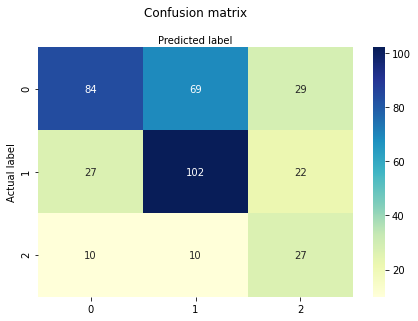

In [15]:
import seaborn as sns
class_names = [0,1] # name of classes
fig, ax = plot.subplots()
tick_marks = np.arange(len(class_names))
plot.xticks(tick_marks, class_names)
plot.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plot.tight_layout()
plot.title('Confusion matrix', y=1.1)
plot.ylabel('Actual label')
plot.xlabel('Predicted label') 